# <center>Đồ án : Linear Regression</center>

# Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Import thêm dữ thư viện nếu cần

# Đọc dữ liệu

In [2]:
# Đọc dữ liệu bằng pandas
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# Lấy các đặc trưng X và giá trị mục tiêu y cho các tập huấn luyện (train) và kiểm tra (test)
X_train = train.iloc[:, :-1]    # Dataframe (chứa 10 đặc trưng huấn luyện)
y_train = train.iloc[:, -1]     # Series    (chứa 1 giá trị mục tiêu kiểm tra)

X_test = test.iloc[:, :-1]      # Dataframe (chứa 10 đặc trưng kiểm tra)
y_test = test.iloc[:, -1]       # Series    (chứa 1 giá trị mục tiêu kiểm tra)

# Sinh viên có thể sử dụng các khác nếu cần

# Convert dataframe or series to numpy array
X_train_np = X_train.to_numpy()
y_train_np = y_train.to_numpy()

# Convert dataframe or series to numpy array
X_test_np = X_test.to_numpy()
y_test_np = y_test.to_numpy()

# Get the header names of 11 attributes
headerName = list(train.columns)

# Cài đặt hàm

In [3]:
# Cài đặt các hàm cần thiết ở đây
def plot_data(x, y):
    plt.scatter(x, y, color='b', marker='o')
  
    plt.xlabel('x')
    plt.ylabel('y')
  
    plt.grid()
    plt.show()

class OLSLinearRegression:
    def fit(self, X, y):
        X_pinv = np.linalg.inv(X.T @ X) @ X.T    # np.linalg.pinv(X)
        self.w = X_pinv @ y
        return self
    
    def get_params(self):
        return self.w

    def predict(self, X):
        return np.sum(self.w.ravel() * X, axis=1)
    
def rmse(y, y_hat):
    return np.sqrt(np.mean((y.ravel() - y_hat.ravel())**2))

# Plot all features


Adult Mortality:



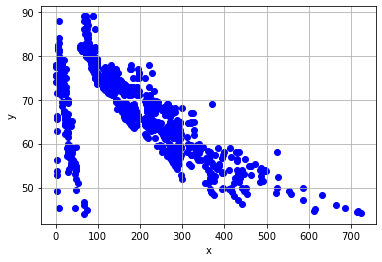


BMI:



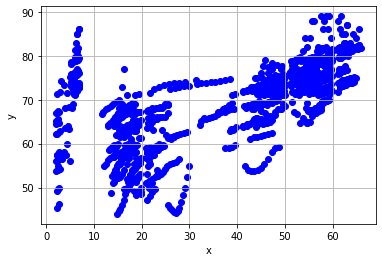


Polio:



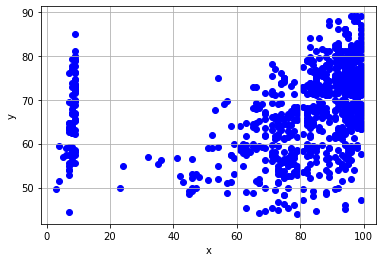


Diphtheria:



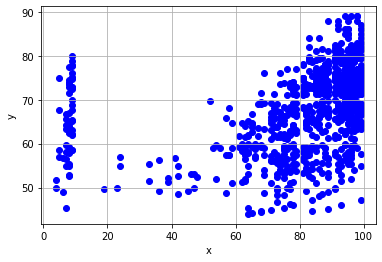


HIV/AIDS:



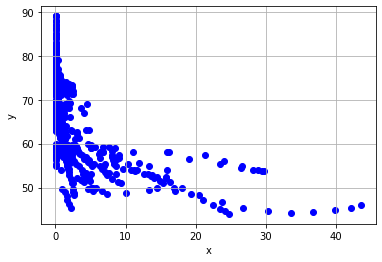


GDP:



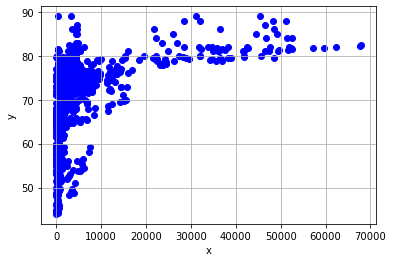


Thinness age 10-19:



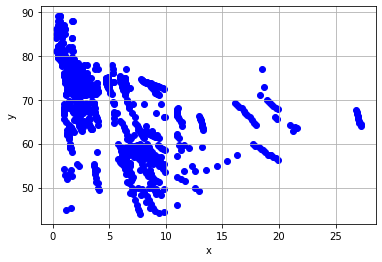


Thinness age 5-9:



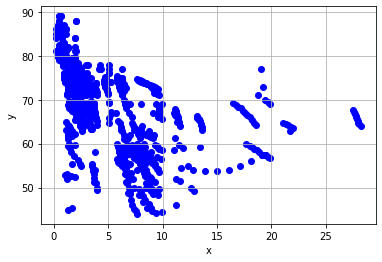


Income composition of resources:



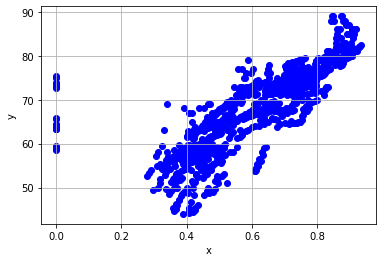


Schooling:



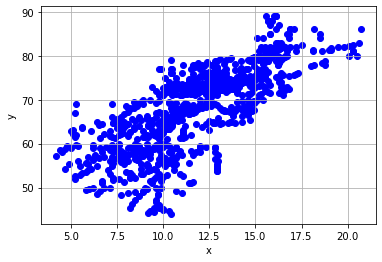

In [4]:
for i in range(10):
    X, y = X_train_np[:, i].reshape(-1,1), y_train_np.reshape(-1,1)
    print(f'\n{headerName[i]}:\n')
    plot_data(X, y)

# Yêu cầu 1a: Sử dụng toàn bộ 10 đặc trưng đề bài cung cấp (2 điểm) 

In [5]:
# Phần code cho yêu cầu 1a
# Train model with all features
lr = OLSLinearRegression().fit(X_train_np, y_train_np)
w = lr.get_params().ravel()
y_test_pred = lr.predict(X_test_np)
print(w)

[ 1.51013627e-02  9.02199807e-02  4.29218175e-02  1.39289117e-01
 -5.67332827e-01 -1.00765115e-04  7.40713438e-01  1.90935798e-01
  2.45059736e+01  2.39351661e+00]


In [6]:
# Gọi hàm RMSE (tự cài đặt hoặc từ thư viện) trên tập kiểm tra
print(rmse(y_test_np, y_test_pred))

7.064046430584337


Công thức hồi quy

$$\text{Life expectancy} = 0.0151 \times \text{Adult Mortality} + 0.0902 \times \text{BMI} + 0.0429 \times \text{Polio} + 0.1393 \times \text{Diphtheria} + (-0.5673) \times \text{HIV/AIDS} + (-0.0001) \times \text{GDP} + 0.7407 \times \text{Thinness age 10-19} + 0.1909 \times \text{Thinness age 5-9} + 24.506 \times \text{Income composition of resources} + 2.3935 \times \text{Schooling}$$

# Xây dựng mô hình sử dụng duy nhất 1 đặc trưng, tìm mô hình cho kết quả tốt nhất 

In [7]:
# Phần code cho yêu cầu 
# Tìm ra đặc trưng tốt nhất
# In ra các kết quả cross-validation như yêu cầu

# Get copies of X_train and y_train
X_train_clone = X_train_np.copy()
y_train_clone = y_train_np.copy()

# Shuffle data for 1 time only before apply K-fold cross validation
# Generate a random order list from 0->1084 and assign X_train_clone and y_train_clone 
# to the relative position of this random list
randomize = np.arange(len(X_train_clone))
np.random.shuffle(randomize)
X_train_clone = X_train_clone[randomize]
y_train_clone = y_train_clone[randomize]

# Create RMSE list for 10 features
RMSE = np.zeros(10)
for i in range(10):
    # Get X_train_feature from X_train_clone set of feature i_th
    X_train_feature = X_train_clone[:, i]
    # Get y_train_feature from y_train_clone
    y_train_feature = y_train_clone
    
    # Get number of rows in the dataset
    numOfRows = X_train_feature.shape[0]
    # Length of validation set when using KFold cross validation technique
    length_per_set = int(numOfRows/5)
    
    # Apply 5-fold cross validation by iterate 5 times and split train set and validation set 
    for j in range(5):
        # Get the i_th set after split the X_train_feature into 5 equal parts
        X_val = X_train_feature[(j*length_per_set):((j+1)*length_per_set)].reshape(-1,1)
        # Get all values before X_val set after split the X_train_feature into 5 equal parts
        X_first_part_train_kfold = X_train_feature[:(j*length_per_set)].reshape(-1,1)
        # Get all values after X_val set after split the X_train_feature into 5 equal parts
        X_second_part_train_kfold = X_train_feature[((j+1)*length_per_set):].reshape(-1,1)
        # Concatenate 2 train set into 1 train set to train the model and test on validation set
        X_train_kfold = np.concatenate((X_first_part_train_kfold, X_second_part_train_kfold), axis=0).reshape(-1,1)
        
        # Get the i_th set after split the y_train_feature into 5 equal parts
        y_val = y_train_feature[(j*length_per_set):((j+1)*length_per_set)].reshape(-1,1)
        # Get all values before y_val set after split the y_train_feature into 5 equal parts
        y_first_part_train_kfold = y_train_feature[:(j*length_per_set)].reshape(-1,1)
        # Get all values after y_val set after split the y_train_feature into 5 equal parts
        y_second_part_train_kfold = y_train_feature[((j+1)*length_per_set):].reshape(-1,1)
        # Concatenate 2 train set into 1 train set to train the model and test on validation set
        y_train_kfold = np.concatenate((y_first_part_train_kfold, y_second_part_train_kfold), axis=0).reshape(-1,1)
        
        # Train model with the i_th feature
        lr = OLSLinearRegression().fit(X_train_kfold, y_train_kfold)
        y_val_pred = lr.predict(X_val)
        RMSE[i] += rmse(y_val, y_val_pred)
    # Get average of RMSE for 5 validation times of i_th feature
    RMSE[i] /= 5

# Get index of feature with minimum RMSE 
best_feature_index = np.argmin(RMSE, axis=0)
    
# Create dictionay from the table of the requirement
dict_1b = {'Mô hình với 1 đặc trưng': headerName[:-1], 'RMSE':RMSE}
# creating a dataframe from dictionary
df_1b = pd.DataFrame(dict_1b)
# Align center for all columns of dataframe
center_aligned_df = df_1b.style.set_properties(**{'text-align': 'center'})
# Display dataframe
display(center_aligned_df)

,Mô hình với 1 đặc trưng,RMSE
0,Adult Mortality,46.208800
1,BMI,27.945299
2,Polio,17.982544
3,Diphtheria,15.939963
4,HIV/AIDS,67.178556
5,GDP,60.210137
6,Thinness age 10-19,51.785794
7,Thinness age 5-9,51.706968
8,Income composition of resources,13.103457
9,Schooling,11.777326


In [8]:
# Huấn luyện lại mô hình best_feature_model với đặc trưng tốt nhất trên toàn bộ tập huấn luyện

# Get Schooling training set and testing set
X_Schooling_train, y_Schooling_train = X_train_np[:, best_feature_index].reshape(-1,1), y_train_np.reshape(-1,1)
X_Schooling_test, y_Schooling_test = X_test_np[:, best_feature_index].reshape(-1,1), y_test_np.reshape(-1,1)
# Train feature Schooling in all training dataset
lr = OLSLinearRegression().fit(X_Schooling_train, y_Schooling_train)
w = lr.get_params().ravel()
y_Schooling_test_pred = lr.predict(X_Schooling_test)
print(w)

[5.5573994]


In [9]:
# Gọi hàm RMSE (tự cài đặt hoặc từ thư viện) trên tập kiểm tra với mô hình best_feature_model
print(rmse(y_Schooling_test, y_Schooling_test_pred))

10.260950391655376


Công thức hồi quy

$$\text{Life expectancy} = 5.5573994 \times \text{Schooling}$$

# Yêu cầu : Sinh viên tự xây dựng mô hình, tìm mô hình cho kết quả tốt nhất (3 điểm)

Lưu ý: khi sử dụng cross-validation, sinh viên cần xáo trộn dữ liệu 1 lần duy nhất và thực hiện trên toàn bộ $m$ mô hình mà sinh viên thiết kế

In [10]:
# Phần code cho yêu cầu 1c
# Tìm ra mô hình tốt nhất (tự thiết kế bởi sinh viên)
# In ra các kết quả cross-validation như yêu cầu

# Get copies of X_train and y_train
X_train_clone = train.iloc[:, :-1].copy() # Dataframe
y_train_clone = train.iloc[:, -1].copy() # Dataframe

# Shuffle data for 1 time only before apply K-fold cross validation
# Generate a random order list from 0->1084 and assign X_train_clone and y_train_clone 
# to the relative position of this random list
randomize = np.arange(len(X_train_clone))
np.random.shuffle(randomize)
X_train_clone = X_train_clone.iloc[randomize]
y_train_clone = y_train_clone.iloc[randomize]

# Create RMSE list for 3 models
RMSE = np.zeros(3)

# My first model:
# LE = w1*Polio + w2*Diphtheria + w3*Income composition of resources + w4*Schooling
X_train_Polio_Diph_Income_Schooling = X_train_clone[['Polio','Diphtheria','Income composition of resources','Schooling']].to_numpy()
y_train_Polio_Diph_Income_Schooling = y_train_clone.to_numpy()

# Apply 5-fold cross validation by iterate 5 times and split train set and validation set 
for j in range(5):
    # Get the i_th set after split the X_train_feature into 5 equal parts
    X_val = X_train_Polio_Diph_Income_Schooling[(j*length_per_set):((j+1)*length_per_set)]
    # Get all values before X_val set after split the X_train_feature into 5 equal parts
    X_first_part_train_kfold = X_train_Polio_Diph_Income_Schooling[:(j*length_per_set)]
    # Get all values after X_val set after split the X_train_feature into 5 equal parts
    X_second_part_train_kfold = X_train_Polio_Diph_Income_Schooling[((j+1)*length_per_set):]
    # Concatenate 2 train set into 1 train set to train the model and test on validation set
    X_train_kfold = np.concatenate((X_first_part_train_kfold, X_second_part_train_kfold), axis=0)
    
    # Get the i_th set after split the y_train_feature into 5 equal parts
    y_val = y_train_Polio_Diph_Income_Schooling[(j*length_per_set):((j+1)*length_per_set)].reshape(-1,1)
    # Get all values before y_val set after split the y_train_feature into 5 equal parts
    y_first_part_train_kfold = y_train_Polio_Diph_Income_Schooling[:(j*length_per_set)].reshape(-1,1)
    # Get all values after y_val set after split the y_train_feature into 5 equal parts
    y_second_part_train_kfold = y_train_Polio_Diph_Income_Schooling[((j+1)*length_per_set):].reshape(-1,1)
    # Concatenate 2 train set into 1 train set to train the model and test on validation set
    y_train_kfold = np.concatenate((y_first_part_train_kfold, y_second_part_train_kfold), axis=0).reshape(-1,1)
    
    # Train model with the first model
    lr = OLSLinearRegression().fit(X_train_kfold, y_train_kfold)
    y_val_pred = lr.predict(X_val)
    RMSE[0] += rmse(y_val, y_val_pred)
RMSE[0] /= 5


# My second model:
# LE = w1*(Schooling) + w2*(1/HIVS)
X_train_Schooling = X_train_clone[['Schooling']].to_numpy().reshape(-1,1)
X_train_HIVS = X_train_clone[['HIV/AIDS']].to_numpy().reshape(-1,1)
X_train_HIVS = 1/X_train_HIVS
X_train_Schooling_HIVS = np.hstack((X_train_Schooling, X_train_HIVS))
y_train_Schooling_HIVS = y_train_clone.to_numpy()

# Apply 5-fold cross validation technique
for j in range(5):
    # Get the i_th set after split the X_train_feature into 5 equal parts
    X_val = X_train_Schooling_HIVS[(j*length_per_set):((j+1)*length_per_set)]
    # Get all values before X_val set after split the X_train_feature into 5 equal parts
    X_first_part_train_kfold = X_train_Schooling_HIVS[:(j*length_per_set)]
    # Get all values after X_val set after split the X_train_feature into 5 equal parts
    X_second_part_train_kfold = X_train_Schooling_HIVS[((j+1)*length_per_set):]
    # Concatenate 2 train set into 1 train set to train the model and test on validation set
    X_train_kfold = np.concatenate((X_first_part_train_kfold, X_second_part_train_kfold), axis=0)
    
    # Get the i_th set after split the y_train_feature into 5 equal parts
    y_val = y_train_Schooling_HIVS[(j*length_per_set):((j+1)*length_per_set)].reshape(-1,1)
    # Get all values before y_val set after split the y_train_feature into 5 equal parts
    y_first_part_train_kfold = y_train_Schooling_HIVS[:(j*length_per_set)].reshape(-1,1)
    # Get all values after y_val set after split the y_train_feature into 5 equal parts
    y_second_part_train_kfold = y_train_Schooling_HIVS[((j+1)*length_per_set):].reshape(-1,1)
    # Concatenate 2 train set into 1 train set to train the model and test on validation set
    y_train_kfold = np.concatenate((y_first_part_train_kfold, y_second_part_train_kfold), axis=0).reshape(-1,1)
    
    # Train model with the first model
    lr = OLSLinearRegression().fit(X_train_kfold, y_train_kfold)
    y_val_pred = lr.predict(X_val)
    RMSE[1] += rmse(y_val, y_val_pred)
RMSE[1] /= 5


# My third model:
# LE = w1*(Income composition of resources + Schooling) + w2*(Polio + Diphtheria)
# Get array of (Income composition of resources + Schooling)
X_train_IncomeSchooling = X_train_clone['Income composition of resources'].to_numpy().reshape(-1,1) + X_train_clone['Schooling'].to_numpy().reshape(-1,1)
# Get array of (Polio + Diphtheria)
X_train_PolioDiph = X_train_clone['Polio'].to_numpy().reshape(-1,1) + X_train_clone['Diphtheria'].to_numpy().reshape(-1,1)
# Get array of column (Income composition of resources + Schooling) and column (Polio + Diphtheria)
X_train_IncomeSchooling_PolioDiph = np.hstack((X_train_IncomeSchooling, X_train_PolioDiph))
y_train_IncomeSchooling_PolioDiph = y_train_clone.to_numpy()

# Apply 5-fold cross validation technique
for j in range(5):
    # Get the i_th set after split the X_train_feature into 5 equal parts
    X_val = X_train_IncomeSchooling_PolioDiph[(j*length_per_set):((j+1)*length_per_set)]
    # Get all values before X_val set after split the X_train_feature into 5 equal parts
    X_first_part_train_kfold = X_train_IncomeSchooling_PolioDiph[:(j*length_per_set)]
    # Get all values after X_val set after split the X_train_feature into 5 equal parts
    X_second_part_train_kfold = X_train_IncomeSchooling_PolioDiph[((j+1)*length_per_set):]
    # Concatenate 2 train set into 1 train set to train the model and test on validation set
    X_train_kfold = np.concatenate((X_first_part_train_kfold, X_second_part_train_kfold), axis=0)
    
    # Get the i_th set after split the y_train_feature into 5 equal parts
    y_val = y_train_IncomeSchooling_PolioDiph[(j*length_per_set):((j+1)*length_per_set)].reshape(-1,1)
    # Get all values before y_val set after split the y_train_feature into 5 equal parts
    y_first_part_train_kfold = y_train_IncomeSchooling_PolioDiph[:(j*length_per_set)].reshape(-1,1)
    # Get all values after y_val set after split the y_train_feature into 5 equal parts
    y_second_part_train_kfold = y_train_IncomeSchooling_PolioDiph[((j+1)*length_per_set):].reshape(-1,1)
    # Concatenate 2 train set into 1 train set to train the model and test on validation set
    y_train_kfold = np.concatenate((y_first_part_train_kfold, y_second_part_train_kfold), axis=0).reshape(-1,1)
    
    # Train model with the first model
    lr = OLSLinearRegression().fit(X_train_kfold, y_train_kfold)
    y_val_pred = lr.predict(X_val)
    RMSE[2] += rmse(y_val, y_val_pred)
RMSE[2] /= 5


# Get index of models with minimum RMSE 
my_best_model = np.argmin(RMSE, axis=0)

my_models_name = ['w1*Polio + w2*Diphtheria + w3*Income composition of resources + w4*Schooling',
                  'w1*(Schooling) + w2*(1/HIVS)',
                  'w1*(Income composition of resources + Schooling) + w2*(Polio + Diphtheria)']

# Create dictionay from the table of the requirement
dict_1c = {'Mô hình': my_models_name, 'RMSE':RMSE}
# creating a dataframe from dictionary
df_1c = pd.DataFrame(dict_1c)
# Align center for all columns of dataframe
center_aligned_df = df_1c.style.set_properties(**{'text-align': 'center'})
# Display dataframe
display(center_aligned_df)

,Mô hình,RMSE
0,w1*Polio + w2*Diphtheria + w3*Income composition of resources + w4*Schooling,9.588742
1,w1*(Schooling) + w2*(1/HIVS),11.794776
2,w1*(Income composition of resources + Schooling) + w2*(Polio + Diphtheria),9.873081


In [11]:
# Huấn luyện lại mô hình my_best_model trên toàn bộ tập huấn luyện

X_train_clone = train.iloc[:, :-1].copy() # Dataframe
y_train_clone = train.iloc[:, -1].copy() # Dataframe
X_test_clone = test.iloc[:, :-1].copy() # Dataframe
y_test_clone = test.iloc[:, -1].copy() # Dataframe

X_my_best_model_train = []
y_my_best_model_train = []
X_my_best_model_test = []
y_my_best_model_test = []

if(my_best_model == 0):
    # My first model:
    # LE = w1*Polio + w2*Diphtheria + w3*Income composition of resources + w4*Schooling
    print('First model is the best model of three\'s')
    X_my_best_model_train = X_train_clone[['Polio','Diphtheria','Income composition of resources','Schooling']].to_numpy()
    y_my_best_model_train = y_train_clone.to_numpy()
    X_my_best_model_test = X_test_clone[['Polio','Diphtheria','Income composition of resources','Schooling']].to_numpy()
    y_my_best_model_test = y_test_clone.to_numpy()
elif(my_best_model == 1):
    # My second model:
    # LE = w1*(Polio)^2 + w2*(Diphtheria)^2 + w3*(Income composition of resources)^2 + w4*(Schooling)^2
    print('Second model is the best model of three\'s')    
    X_train_Schooling = X_train_clone[['Schooling']].to_numpy().reshape(-1,1)
    X_train_HIVS = X_train_clone[['HIV/AIDS']].to_numpy().reshape(-1,1)
    X_train_HIVS = 1 / X_train_HIVS
    X_my_best_model_test = np.hstack((X_train_Schooling, X_train_HIVS))
    y_my_best_model_test = y_train_clone.to_numpy()
else:
    # My third model:
    # LE = w1*(Income composition of resources + Schooling) + w2*(Polio + Diphtheria)
    # Get array of (Income composition of resources + Schooling)
    print('Third model is the best model of three\'s')
    X_train_IncomeSchooling = X_train_clone['Income composition of resources'].to_numpy().reshape(-1,1) + X_train_clone['Schooling'].to_numpy().reshape(-1,1)
    # Get array of (Polio + Diphtheria)
    X_train_PolioDiph = X_train_clone['Polio'].to_numpy().reshape(-1,1) + X_train_clone['Diphtheria'].to_numpy().reshape(-1,1)
    # Get array of column (Income composition of resources + Schooling) and column (Polio + Diphtheria)
    X_my_best_model_train = np.hstack((X_train_IncomeSchooling, X_train_PolioDiph))
    y_my_best_model_train = y_train_clone.to_numpy()
    
    # Get array of (Income composition of resources + Schooling)
    X_test_IncomeSchooling = X_test_clone['Income composition of resources'].to_numpy().reshape(-1,1) + X_test_clone['Schooling'].to_numpy().reshape(-1,1)
    # Get array of (Polio + Diphtheria)
    X_test_PolioDiph = X_test_clone['Polio'].to_numpy().reshape(-1,1) + X_test_clone['Diphtheria'].to_numpy().reshape(-1,1)
    # Get array of column (Income composition of resources + Schooling) and column (Polio + Diphtheria)
    X_my_best_model_test = np.hstack((X_test_IncomeSchooling, X_test_PolioDiph))
    y_my_best_model_test = y_test_clone.to_numpy()
    

# Train feature Schooling in all training dataset
lr = OLSLinearRegression().fit(X_my_best_model_train, y_my_best_model_train)
w = lr.get_params().ravel()
y_my_best_model_test_pred = lr.predict(X_my_best_model_test)
print('w:', w)

First model is the best model of three's
w: [ 0.08707345  0.1896732  27.37948694  2.27304759]


In [12]:
# Gọi hàm RMSE (tự cài đặt hoặc từ thư viện) trên tập kiểm tra với mô hình my_best_model
print(rmse(y_my_best_model_test, y_my_best_model_test_pred))

8.362637897580539


Công thức hồi quy

$$\text{Life expectancy} = 0.08707345 \times \text{Polio} + 0.1896732 \times \text{Diphtheria} + 27.37948694 \times \text{Income composition of resources} + 2.27304759 \times \text{Schooling}$$